In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import ast
import re
import joblib

In [2]:
df=pd.read_csv('../data/Carbon Emission.csv')
df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [3]:
dataset=df

In [4]:
df.isnull().sum()

Body Type                           0
Sex                                 0
Diet                                0
How Often Shower                    0
Heating Energy Source               0
Transport                           0
Vehicle Type                     6721
Social Activity                     0
Monthly Grocery Bill                0
Frequency of Traveling by Air       0
Vehicle Monthly Distance Km         0
Waste Bag Size                      0
Waste Bag Weekly Count              0
How Long TV PC Daily Hour           0
How Many New Clothes Monthly        0
How Long Internet Daily Hour        0
Energy efficiency                   0
Recycling                           0
Cooking_With                        0
CarbonEmission                      0
dtype: int64

In [5]:
df.describe()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,173.875200,2031.485900,4.024600,12.139200,25.109000,11.889100,2269.147300
std,72.234018,2769.715597,1.990375,7.106369,14.698725,7.277218,1017.675247
min,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,306.000000
25%,111.000000,69.000000,2.000000,6.000000,13.000000,6.000000,1538.000000
50%,173.000000,823.000000,4.000000,12.000000,25.000000,12.000000,2080.000000
75%,237.000000,2516.750000,6.000000,18.000000,38.000000,18.000000,2768.000000
max,299.000000,9999.000000,7.000000,24.000000,50.000000,24.000000,8377.000000


In [6]:
df['Social Activity'].unique()

array(['often', 'never', 'sometimes'], dtype=object)

In [7]:
df['Transport'].unique()

array(['public', 'walk/bicycle', 'private'], dtype=object)

In [8]:
def impute_vehicle_type(row):
    if pd.isnull(row['Vehicle Type']):
        transport = str(row['Transport']).lower()
        if transport == 'public':
            return 'Bus'
        elif transport == 'walk/bicycle':
            return 'None'
        elif transport == 'private':
            return 'Unknown'
    return row['Vehicle Type']

df['Vehicle Type'] = df.apply(impute_vehicle_type, axis=1)


In [9]:
df['Vehicle Type'].isnull().sum()

np.int64(0)

In [10]:
df['Vehicle Type'].unique()

array(['Bus', 'None', 'petrol', 'diesel', 'hybrid', 'lpg', 'electric'],
      dtype=object)

In [11]:
df.isnull().sum()
# no missing values

Body Type                        0
Sex                              0
Diet                             0
How Often Shower                 0
Heating Energy Source            0
Transport                        0
Vehicle Type                     0
Social Activity                  0
Monthly Grocery Bill             0
Frequency of Traveling by Air    0
Vehicle Monthly Distance Km      0
Waste Bag Size                   0
Waste Bag Weekly Count           0
How Long TV PC Daily Hour        0
How Many New Clothes Monthly     0
How Long Internet Daily Hour     0
Energy efficiency                0
Recycling                        0
Cooking_With                     0
CarbonEmission                   0
dtype: int64

In [12]:
def clean_col_names(df):
    cols = df.columns
    new_cols = []
    for col in cols:
        new_col = re.sub(r'[^A-Za-z0-9_]+', '', col)
        new_cols.append(new_col)
    df.columns = new_cols
    return df
clean_col_names(df)

,BodyType,Sex,Diet,HowOftenShower,HeatingEnergySource,Transport,VehicleType,SocialActivity,MonthlyGroceryBill,FrequencyofTravelingbyAir,VehicleMonthlyDistanceKm,WasteBagSize,WasteBagWeeklyCount,HowLongTVPCDailyHour,HowManyNewClothesMonthly,HowLongInternetDailyHour,Energyefficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,Bus,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,None,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,None,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,obese,male,omnivore,twice a day,coal,private,hybrid,sometimes,230,never,268,medium,5,12,27,9,Yes,[],['Microwave'],2408
9996,normal,female,vegan,twice a day,coal,private,lpg,never,234,frequently,5316,extra large,3,14,8,24,Sometimes,"['Paper', 'Plastic']","['Stove', 'Microwave']",3084
9997,overweight,female,vegetarian,daily,electricity,walk/bicycle,None,sometimes,298,very frequently,96,extra large,5,11,5,24,Yes,"['Paper', 'Plastic', 'Metal']","['Microwave', 'Grill', 'Airfryer']",2377
9998,underweight,male,vegan,more frequently,coal,private,petrol,often,179,rarely,8688,medium,5,19,14,5,Sometimes,"['Paper', 'Metal']","['Stove', 'Microwave', 'Grill', 'Airfryer']",4574


In [13]:
print(df[df.duplicated()])
# no duplicate values

Empty DataFrame
Columns: [BodyType, Sex, Diet, HowOftenShower, HeatingEnergySource, Transport, VehicleType, SocialActivity, MonthlyGroceryBill, FrequencyofTravelingbyAir, VehicleMonthlyDistanceKm, WasteBagSize, WasteBagWeeklyCount, HowLongTVPCDailyHour, HowManyNewClothesMonthly, HowLongInternetDailyHour, Energyefficiency, Recycling, Cooking_With, CarbonEmission]
Index: []


In [14]:
df.head()

,BodyType,Sex,Diet,HowOftenShower,HeatingEnergySource,Transport,VehicleType,SocialActivity,MonthlyGroceryBill,FrequencyofTravelingbyAir,VehicleMonthlyDistanceKm,WasteBagSize,WasteBagWeeklyCount,HowLongTVPCDailyHour,HowManyNewClothesMonthly,HowLongInternetDailyHour,Energyefficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,Bus,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,None,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,None,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [15]:
df.columns

Index(['BodyType', 'Sex', 'Diet', 'HowOftenShower', 'HeatingEnergySource',
       'Transport', 'VehicleType', 'SocialActivity', 'MonthlyGroceryBill',
       'FrequencyofTravelingbyAir', 'VehicleMonthlyDistanceKm', 'WasteBagSize',
       'WasteBagWeeklyCount', 'HowLongTVPCDailyHour',
       'HowManyNewClothesMonthly', 'HowLongInternetDailyHour',
       'Energyefficiency', 'Recycling', 'Cooking_With', 'CarbonEmission'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   BodyType                   10000 non-null  object
 1   Sex                        10000 non-null  object
 2   Diet                       10000 non-null  object
 3   HowOftenShower             10000 non-null  object
 4   HeatingEnergySource        10000 non-null  object
 5   Transport                  10000 non-null  object
 6   VehicleType                10000 non-null  object
 7   SocialActivity             10000 non-null  object
 8   MonthlyGroceryBill         10000 non-null  int64 
 9   FrequencyofTravelingbyAir  10000 non-null  object
 10  VehicleMonthlyDistanceKm   10000 non-null  int64 
 11  WasteBagSize               10000 non-null  object
 12  WasteBagWeeklyCount        10000 non-null  int64 
 13  HowLongTVPCDailyHour       10000 non-null  int64 
 14  HowMany

In [17]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [18]:
categorical_cols

['BodyType',
 'Sex',
 'Diet',
 'HowOftenShower',
 'HeatingEnergySource',
 'Transport',
 'VehicleType',
 'SocialActivity',
 'FrequencyofTravelingbyAir',
 'WasteBagSize',
 'Energyefficiency',
 'Recycling',
 'Cooking_With']

In [19]:
unique_values_dict = {col: df[col].unique().tolist() for col in categorical_cols}

# Print the dictionary of UNIQUE values in each categorical column
for col, values in unique_values_dict.items():
    print(f"{col}: {values}")


BodyType: ['overweight', 'obese', 'underweight', 'normal']
Sex: ['female', 'male']
Diet: ['pescatarian', 'vegetarian', 'omnivore', 'vegan']
HowOftenShower: ['daily', 'less frequently', 'more frequently', 'twice a day']
HeatingEnergySource: ['coal', 'natural gas', 'wood', 'electricity']
Transport: ['public', 'walk/bicycle', 'private']
VehicleType: ['Bus', 'None', 'petrol', 'diesel', 'hybrid', 'lpg', 'electric']
SocialActivity: ['often', 'never', 'sometimes']
FrequencyofTravelingbyAir: ['frequently', 'rarely', 'never', 'very frequently']
WasteBagSize: ['large', 'extra large', 'small', 'medium']
Energyefficiency: ['No', 'Sometimes', 'Yes']
Recycling: ["['Metal']", "['Paper', 'Plastic', 'Glass', 'Metal']", "['Paper']", "['Paper', 'Glass', 'Metal']", '[]', "['Paper', 'Plastic', 'Glass']", "['Glass']", "['Paper', 'Plastic']", "['Plastic']", "['Plastic', 'Glass', 'Metal']", "['Paper', 'Plastic', 'Metal']", "['Paper', 'Glass']", "['Paper', 'Metal']", "['Glass', 'Metal']", "['Plastic', 'Glass']

In [20]:
numerical_cols

['MonthlyGroceryBill',
 'VehicleMonthlyDistanceKm',
 'WasteBagWeeklyCount',
 'HowLongTVPCDailyHour',
 'HowManyNewClothesMonthly',
 'HowLongInternetDailyHour',
 'CarbonEmission']

In [21]:
X = df.drop('CarbonEmission', axis=1)
y = df['CarbonEmission']

In [22]:
X.columns

Index(['BodyType', 'Sex', 'Diet', 'HowOftenShower', 'HeatingEnergySource',
       'Transport', 'VehicleType', 'SocialActivity', 'MonthlyGroceryBill',
       'FrequencyofTravelingbyAir', 'VehicleMonthlyDistanceKm', 'WasteBagSize',
       'WasteBagWeeklyCount', 'HowLongTVPCDailyHour',
       'HowManyNewClothesMonthly', 'HowLongInternetDailyHour',
       'Energyefficiency', 'Recycling', 'Cooking_With'],
      dtype='object')

In [23]:
X['Recycling'] = X['Recycling'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
X['Cooking_With'] = X['Cooking_With'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])


In [24]:
X.head()

,BodyType,Sex,Diet,HowOftenShower,HeatingEnergySource,Transport,VehicleType,SocialActivity,MonthlyGroceryBill,FrequencyofTravelingbyAir,VehicleMonthlyDistanceKm,WasteBagSize,WasteBagWeeklyCount,HowLongTVPCDailyHour,HowManyNewClothesMonthly,HowLongInternetDailyHour,Energyefficiency,Recycling,Cooking_With
0,overweight,female,pescatarian,daily,coal,public,Bus,often,230,frequently,210,large,4,7,26,1,No,[Metal],"[Stove, Oven]"
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,None,often,114,rarely,9,extra large,3,9,38,5,No,[Metal],"[Stove, Microwave]"
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,[Metal],"[Oven, Microwave]"
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,None,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"[Paper, Plastic, Glass, Metal]","[Microwave, Grill, Airfryer]"
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,[Paper],[Oven]


In [25]:
X['Recycling']

0                              [Metal]
1                              [Metal]
2                              [Metal]
3       [Paper, Plastic, Glass, Metal]
4                              [Paper]
                     ...              
9995                                []
9996                  [Paper, Plastic]
9997           [Paper, Plastic, Metal]
9998                    [Paper, Metal]
9999           [Plastic, Glass, Metal]
Name: Recycling, Length: 10000, dtype: object

In [26]:
print(X['Recycling'].iloc[3])

['Paper', 'Plastic', 'Glass', 'Metal']


In [27]:
from sklearn.preprocessing import MultiLabelBinarizer

# For Recycling
mlb_recycling = MultiLabelBinarizer()
recycling_dummies = pd.DataFrame(mlb_recycling.fit_transform(X['Recycling']),
                                 columns=[f"Recycle_{c}" for c in mlb_recycling.classes_],
                                 index=X.index)

# For Cooking_With
mlb_cooking = MultiLabelBinarizer()
cooking_dummies = pd.DataFrame(mlb_cooking.fit_transform(X['Cooking_With']),
                               columns=[f"Cook_{c}" for c in mlb_cooking.classes_],
                               index=X.index)


In [28]:
joblib.dump(mlb_recycling.classes_, 'recycling_labels.joblib')
joblib.dump(mlb_cooking.classes_, 'cooking_labels.joblib')

['cooking_labels.joblib']

In [29]:
# Drop original columns
X = X.drop(columns=['Recycling', 'Cooking_With'])

# Concatenate new one-hot columns
X = pd.concat([X, recycling_dummies, cooking_dummies], axis=1)


In [30]:
X.head()

,BodyType,Sex,Diet,HowOftenShower,HeatingEnergySource,Transport,VehicleType,SocialActivity,MonthlyGroceryBill,FrequencyofTravelingbyAir,...,Energyefficiency,Recycle_Glass,Recycle_Metal,Recycle_Paper,Recycle_Plastic,Cook_Airfryer,Cook_Grill,Cook_Microwave,Cook_Oven,Cook_Stove
0,overweight,female,pescatarian,daily,coal,public,Bus,often,230,frequently,...,No,0,1,0,0,0,0,0,1,1
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,None,often,114,rarely,...,No,0,1,0,0,0,0,1,0,1
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,...,Sometimes,0,1,0,0,0,0,1,1,0
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,None,sometimes,157,rarely,...,Sometimes,1,1,1,1,1,1,1,0,0
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,...,Yes,0,0,1,0,0,0,0,1,0


In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   BodyType                   10000 non-null  object
 1   Sex                        10000 non-null  object
 2   Diet                       10000 non-null  object
 3   HowOftenShower             10000 non-null  object
 4   HeatingEnergySource        10000 non-null  object
 5   Transport                  10000 non-null  object
 6   VehicleType                10000 non-null  object
 7   SocialActivity             10000 non-null  object
 8   MonthlyGroceryBill         10000 non-null  int64 
 9   FrequencyofTravelingbyAir  10000 non-null  object
 10  VehicleMonthlyDistanceKm   10000 non-null  int64 
 11  WasteBagSize               10000 non-null  object
 12  WasteBagWeeklyCount        10000 non-null  int64 
 13  HowLongTVPCDailyHour       10000 non-null  int64 
 14  HowMany

In [32]:
X.columns

Index(['BodyType', 'Sex', 'Diet', 'HowOftenShower', 'HeatingEnergySource',
       'Transport', 'VehicleType', 'SocialActivity', 'MonthlyGroceryBill',
       'FrequencyofTravelingbyAir', 'VehicleMonthlyDistanceKm', 'WasteBagSize',
       'WasteBagWeeklyCount', 'HowLongTVPCDailyHour',
       'HowManyNewClothesMonthly', 'HowLongInternetDailyHour',
       'Energyefficiency', 'Recycle_Glass', 'Recycle_Metal', 'Recycle_Paper',
       'Recycle_Plastic', 'Cook_Airfryer', 'Cook_Grill', 'Cook_Microwave',
       'Cook_Oven', 'Cook_Stove'],
      dtype='object')

In [33]:
# Categorical = object or string-type columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
categorical_cols

['BodyType',
 'Sex',
 'Diet',
 'HowOftenShower',
 'HeatingEnergySource',
 'Transport',
 'VehicleType',
 'SocialActivity',
 'FrequencyofTravelingbyAir',
 'WasteBagSize',
 'Energyefficiency']

In [34]:
# ordinal mapping
ordinal_map = {'no': 0, 'sometimes': 1, 'yes': 2}

X['Energyefficiency'] = X['Energyefficiency'].str.lower().map(ordinal_map)

joblib.dump(ordinal_map, 'ordinal_map_energy_efficiency.joblib')

['ordinal_map_energy_efficiency.joblib']

In [35]:
X['Energyefficiency'].unique()

array([0, 1, 2])

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   BodyType                   10000 non-null  object
 1   Sex                        10000 non-null  object
 2   Diet                       10000 non-null  object
 3   HowOftenShower             10000 non-null  object
 4   HeatingEnergySource        10000 non-null  object
 5   Transport                  10000 non-null  object
 6   VehicleType                10000 non-null  object
 7   SocialActivity             10000 non-null  object
 8   MonthlyGroceryBill         10000 non-null  int64 
 9   FrequencyofTravelingbyAir  10000 non-null  object
 10  VehicleMonthlyDistanceKm   10000 non-null  int64 
 11  WasteBagSize               10000 non-null  object
 12  WasteBagWeeklyCount        10000 non-null  int64 
 13  HowLongTVPCDailyHour       10000 non-null  int64 
 14  HowMany

In [37]:
encoded_cols = [col for col in X.columns if col.startswith('Recycle_') or col.startswith('Cook_')] + ['Energyefficiency']
encoded_cols

['Recycle_Glass',
 'Recycle_Metal',
 'Recycle_Paper',
 'Recycle_Plastic',
 'Cook_Airfryer',
 'Cook_Grill',
 'Cook_Microwave',
 'Cook_Oven',
 'Cook_Stove',
 'Energyefficiency']

In [38]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove already encoded columns from numerical_cols
numerical_cols = [col for col in numerical_cols if col not in encoded_cols]
numerical_cols

['MonthlyGroceryBill',
 'VehicleMonthlyDistanceKm',
 'WasteBagWeeklyCount',
 'HowLongTVPCDailyHour',
 'HowManyNewClothesMonthly',
 'HowLongInternetDailyHour']

In [39]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['BodyType',
 'Sex',
 'Diet',
 'HowOftenShower',
 'HeatingEnergySource',
 'Transport',
 'VehicleType',
 'SocialActivity',
 'FrequencyofTravelingbyAir',
 'WasteBagSize']

In [40]:
skew_values = X[numerical_cols].skew()
print(skew_values.sort_values(ascending=False))


VehicleMonthlyDistanceKm    1.482282
HowLongInternetDailyHour    0.019689
MonthlyGroceryBill          0.002999
WasteBagWeeklyCount        -0.013720
HowManyNewClothesMonthly   -0.014404
HowLongTVPCDailyHour       -0.032953
dtype: float64


In [41]:
X['VehicleMonthlyDistanceKm'] = np.log1p(X['VehicleMonthlyDistanceKm'])

In [42]:
skew_values = X[numerical_cols].skew()
print(skew_values.sort_values(ascending=False))


HowLongInternetDailyHour    0.019689
MonthlyGroceryBill          0.002999
WasteBagWeeklyCount        -0.013720
HowManyNewClothesMonthly   -0.014404
HowLongTVPCDailyHour       -0.032953
VehicleMonthlyDistanceKm   -0.362988
dtype: float64


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.columns)


Index(['BodyType', 'Sex', 'Diet', 'HowOftenShower', 'HeatingEnergySource',
       'Transport', 'VehicleType', 'SocialActivity', 'MonthlyGroceryBill',
       'FrequencyofTravelingbyAir', 'VehicleMonthlyDistanceKm', 'WasteBagSize',
       'WasteBagWeeklyCount', 'HowLongTVPCDailyHour',
       'HowManyNewClothesMonthly', 'HowLongInternetDailyHour',
       'Energyefficiency', 'Recycle_Glass', 'Recycle_Metal', 'Recycle_Paper',
       'Recycle_Plastic', 'Cook_Airfryer', 'Cook_Grill', 'Cook_Microwave',
       'Cook_Oven', 'Cook_Stove'],
      dtype='object')


In [44]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # this will keep encoded_cols untouched
)


In [45]:
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

In [46]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Calculate overfitting gap (difference between train and test performance)
    rmse_gap = train_rmse - test_rmse
    r2_gap = train_r2 - test_r2
    
    return {
        'model': model,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'rmse_gap': rmse_gap,
        'r2_gap': r2_gap,
        'pipeline': pipeline
    }

In [47]:
results = {}
for name, model in models.items():
    print(f"Evaluating {name}...")
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Display results
for name, result in results.items():
    print(f"\n{name} Performance:")
    print(f"Train RMSE: {result['train_rmse']:.2f}, Test RMSE: {result['test_rmse']:.2f}")
    print(f"Train R²: {result['train_r2']:.4f}, Test R²: {result['test_r2']:.4f}")
    print(f"RMSE Gap: {result['rmse_gap']:.2f}, R² Gap: {result['r2_gap']:.4f}")

Evaluating Random Forest...
Evaluating AdaBoost...
Evaluating Gradient Boosting...
Evaluating XGBoost...

Random Forest Performance:
Train RMSE: 107.54, Test RMSE: 281.34
Train R²: 0.9888, Test R²: 0.9239
RMSE Gap: -173.80, R² Gap: 0.0649

AdaBoost Performance:
Train RMSE: 471.95, Test RMSE: 469.79
Train R²: 0.7847, Test R²: 0.7877
RMSE Gap: 2.16, R² Gap: -0.0031

Gradient Boosting Performance:
Train RMSE: 188.79, Test RMSE: 208.40
Train R²: 0.9655, Test R²: 0.9582
RMSE Gap: -19.61, R² Gap: 0.0073

XGBoost Performance:
Train RMSE: 52.89, Test RMSE: 164.32
Train R²: 0.9973, Test R²: 0.9740
RMSE Gap: -111.43, R² Gap: 0.0233


In [48]:
best_model_name = max(results.items(), 
                     key=lambda x: (x[1]['test_r2'], -abs(x[1]['r2_gap'])))[0]
best_result = results[best_model_name]

print(f"\nBest model: {best_model_name}")
print(f"Test R²: {best_result['test_r2']:.4f}")
print(f"Overfitting gap (R²): {best_result['r2_gap']:.4f}")


Best model: XGBoost
Test R²: 0.9740
Overfitting gap (R²): 0.0233


In [49]:
print(f"\nPerforming hyperparameter tuning for {best_model_name}...")

if best_model_name == 'Random Forest':
    param_grid = {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4],
        'model__max_features': ['auto', 'sqrt']
    }
elif best_model_name == 'AdaBoost':
    param_grid = {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 1.0],
        'model__loss': ['linear', 'square', 'exponential']
    }
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'model__n_estimators': [100, 200, 300],
        'model__learning_rate': [0.01, 0.05, 0.1],
        'model__max_depth': [3, 5, 7],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2]
    }
elif best_model_name == 'XGBoost':
    param_grid = {
        'model__n_estimators': [100, 200, 300],
        'model__learning_rate': [0.01, 0.05, 0.1],
        'model__max_depth': [3, 5, 7],
        'model__subsample': [0.8, 0.9, 1.0],
        'model__colsample_bytree': [0.8, 0.9, 1.0],
        'model__gamma': [0, 0.1, 0.2],
        'model__reg_alpha': [0, 0.1, 1],
        'model__reg_lambda': [0, 0.1, 1]
    }


Performing hyperparameter tuning for XGBoost...


In [50]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', models[best_model_name])
])

# Randomized search for faster results (can switch to GridSearchCV for exhaustive search)
search = RandomizedSearchCV(
    pipeline,
    param_grid,
    n_iter=20,  # number of parameter settings to sample
    cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)

# Best parameters
print("\nBest parameters found:")
print(search.best_params_)

# Evaluate best model from tuning
best_pipeline = search.best_estimator_

y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTuned Model Performance:")
print(f"Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
print(f"Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
print(f"Overfitting gap (RMSE): {train_rmse - test_rmse:.2f}")
print(f"Overfitting gap (R²): {train_r2 - test_r2:.4f}")

# Save the best model
joblib.dump(best_pipeline, 'best_carbon_emission_model.joblib')
print("\nBest model saved as 'best_carbon_emission_model.joblib'")


Best parameters found:
{'model__subsample': 0.9, 'model__reg_lambda': 0, 'model__reg_alpha': 0.1, 'model__n_estimators': 300, 'model__max_depth': 5, 'model__learning_rate': 0.1, 'model__gamma': 0.1, 'model__colsample_bytree': 1.0}

Tuned Model Performance:
Train RMSE: 57.61, Test RMSE: 125.77
Train R²: 0.9968, Test R²: 0.9848
Overfitting gap (RMSE): -68.15
Overfitting gap (R²): 0.0120

Best model saved as 'best_carbon_emission_model.joblib'


In [51]:
# Feature importance for tree-based models
if hasattr(best_pipeline.named_steps['model'], 'feature_importances_'):
    print("\nFeature Importance:")
    
    # Get feature names after preprocessing
    # For numerical features
    num_features = numerical_cols
    
    # For categorical features (after one-hot encoding)
    cat_encoder = best_pipeline.named_steps['preprocessor'].named_transformers_['cat']
    cat_features = cat_encoder.get_feature_names_out(categorical_cols)
    
    # Combine all feature names
    all_features = list(num_features) + list(cat_features) + encoded_cols
    
    # Get feature importances
    importances = best_pipeline.named_steps['model'].feature_importances_
    
    # Create DataFrame for visualization
    feature_importance = pd.DataFrame({
        'Feature': all_features,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    print(feature_importance.head(10))


Feature Importance:
                                      Feature  Importance
40  FrequencyofTravelingbyAir_very frequently    0.208811
30                       VehicleType_electric    0.202017
24                          Transport_private    0.067008
37       FrequencyofTravelingbyAir_frequently    0.064903
1                    VehicleMonthlyDistanceKm    0.063208
31                         VehicleType_hybrid    0.039933
33                         VehicleType_petrol    0.036477
10                                 Sex_female    0.030410
38            FrequencyofTravelingbyAir_never    0.029876
7                              BodyType_obese    0.027842


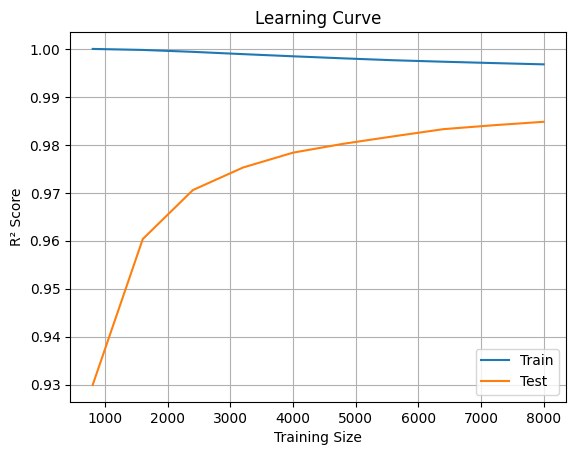

In [52]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    best_pipeline, X, y, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Train')
plt.plot(train_sizes, test_mean, label='Test')
plt.xlabel("Training Size")
plt.ylabel("R² Score")
plt.legend()
plt.title("Learning Curve")
plt.grid(True)
plt.show()
